# Maximum Likelihood

But what if a linear relationship is not an appropriate assumption for our model?

One widely used alternative is maximum likelihood estimation, which involves specifying a class of distributions, indexed by unknown parameters, and then using the data to pin down these parameter values

The benefit relative to linear regression is that it allows more flexibility in the probabilistic relationships between variables



## Steps

The **first step** with maximum likelihood estimation is to choose the probability distribution believed to be generating the data

More precisely, we need to make an assumption as to which **parametric class of distributions** is generating the data

e.g., the class of all normal distributions, or the class of all gamma distributions

Each such class is a family of distributions indexed by a finite number of parameters

e.g., the class of normal distributions is a family of distributions indexed by its mean $\mu \in (-\infty,+\infty)$ and standard deviation $ \sigma \in (0, +\infty) $

We’ll let the data pick out a particular element of the class by pinning down the parameters

The parameter estimates so produced will be called maximum likelihood estimates

## Counting Billionaires

Treisman study is interested in estimating the number of billionaires in different countries

The number of billionaires is integer valued

Hence we consider distributions that take values only in the nonnegative integers

**This is one reason least squares regression is not the best tool for the present problem, since the dependent variable in linear regression is not restricted to integer values**

One **integer distribution** is the Poisson distribution, the probability mass function (pmf) of which is

$f(y) = \frac{\mu^y}{y!} e^{-\mu} $

 Poisson distribution over y for different values of μ as follows:

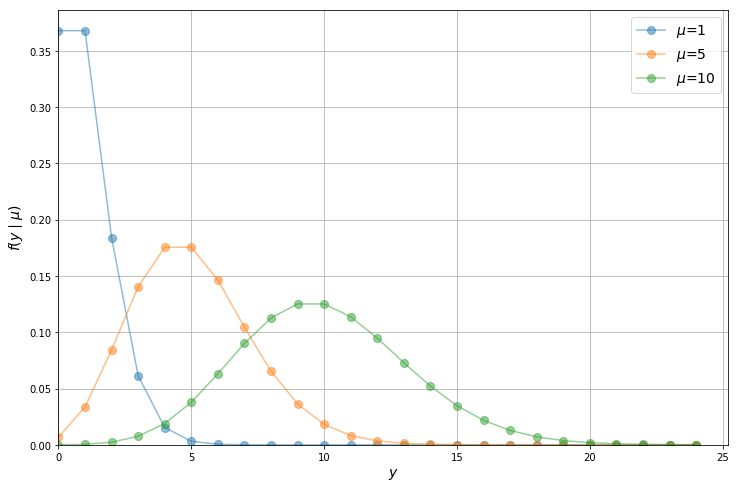

In [1]:
from numpy import exp
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline

poisson_pmf = lambda y, μ: μ**y / factorial(y) * exp(-μ)
y_values = range(0, 25)

fig, ax = plt.subplots(figsize=(12, 8))

for μ in [1, 5, 10]:
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_pmf(y_i, μ))
    ax.plot(y_values,
            distribution,
            label=f'$\mu$={μ}',
            alpha=0.5,
            marker='o',
            markersize=8)

ax.grid()
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$f(y \mid \mu)$', fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)

plt.show()

Notice that the Poisson distribution begins to resemble a normal distribution as the mean of $y$ increases

In [18]:
import pandas as pd
pd.options.display.max_columns = 10

# Load in data and view
df = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/mle/fp.dta')
#df.to_csv('fp.csv')
#df = pd.read_csv('fp.csv')
df.head()

,country,ccode,year,cyear,numbil,...,topint08,rintr,noyrs,roflaw,nrrents
0,United States,2.0,1990.0,21990.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
1,United States,2.0,1991.0,21991.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
2,United States,2.0,1992.0,21992.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
3,United States,2.0,1993.0,21993.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
4,United States,2.0,1994.0,21994.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN


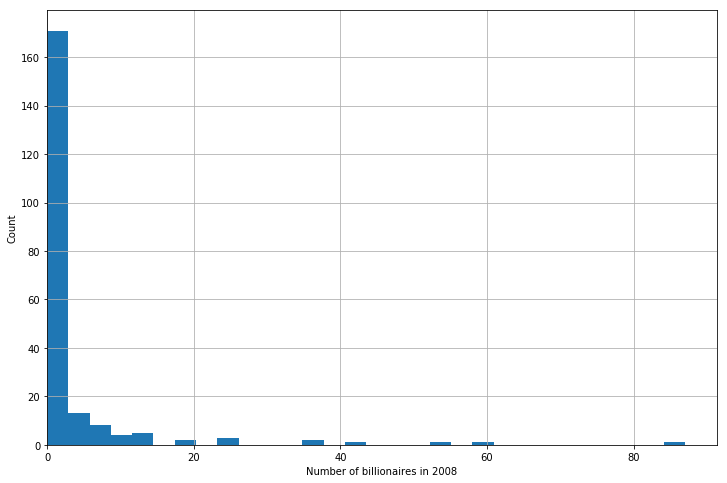

In [26]:
numbil0_2008 = df[(df['year'] == 2008) & (df['country'] != 'United States')].loc[:, 'numbil0']

plt.subplots(figsize=(12, 8))
plt.hist(numbil0_2008, bins=30)
plt.xlim(left=0)
plt.grid()
plt.xlabel('Number of billionaires in 2008')
plt.ylabel('Count')
plt.show()

## Conditional Distributions

In Treisman’s paper, the dependent variable — the number of billionaires $y_i$ in country $i$ — is modeled as a function of 
- GDP per capita
- population size
- years membership in GATT 
- years membership in WTO

Hence, the distribution of $y_i$ needs to be conditioned on the vector of explanatory variables $x_i$
The standard formulation — the so-called poisson regression model — is as follows:

$f(y_i \mid x_i) = \frac{\mu_{i}^{y_i}}{y_i!}e^{-\mu_i}$; $y_i = 0, 1, 2, ..., \infty$

where $\mu_i = e^{x_i^{'} \beta} = e^{\beta_0 + \beta_1 x_{i1} + ... + \beta_k x_{ik}}$

## Conditional Distributions with Sample data for above model

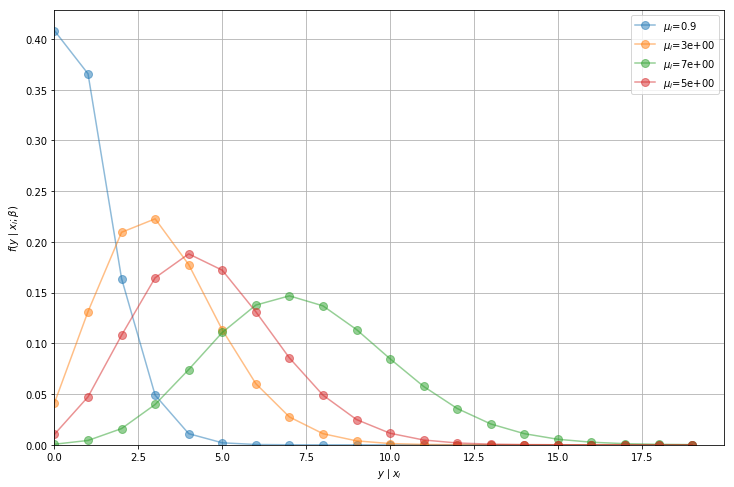

In [30]:
import numpy as np

y_values = range(0, 20)

# Define a parameter vector with estimates
β = np.array([0.26, 0.18, 0.25, -0.1, -0.22]).T

# Create some observations X
datasets = [np.array([0, 1, 1, 1, 2]),
            np.array([2, 3, 2, 4, 0]),
            np.array([3, 4, 5, 3, 2]),
            np.array([6, 5, 4, 4, 7])]


fig, ax = plt.subplots(figsize=(12, 8))

for X in datasets:
    μ = exp(X @ β)
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_pmf(y_i, μ))
    ax.plot(y_values,
            distribution,
            label=f'$\mu_i$={μ:.1}',
            marker='o',
            markersize=8,
            alpha=0.5)

ax.grid()
ax.legend()
ax.set_xlabel('$y \mid x_i$')
ax.set_ylabel(r'$f(y \mid x_i; \beta )$')
ax.axis(xmin=0, ymin=0)
plt.show()


## joint distribution

In our model for number of billionaires, the conditional distribution contains 4 ($k=4$) parameters that we need to estimate

We will label our entire parameter vector as $\beta$ where

$
 \begin{align}
    \beta &= \begin{bmatrix}
           \beta_{0} \\
           \beta_{1} \\
           \beta_{2} \\
           \beta_{3}
         \end{bmatrix}
  \end{align}
$

To estimate the model using MLE, we want to maximize the likelihood that our estimate $\hat{\beta}$ is the true parameter $\beta$
Intuitively, we want to find the $\hat{\beta}$ that best fits our data

First we need to construct the likelihood function $\ell(\beta)$, which is similar to a joint probability density function

Assume we have some data $yi={y1,y2}$ and $yi \sim f(y_i)$

If $y1$ and $y2$ are independent, the joint pmf of these data is $f(y_1,y_2)=f(y1)⋅f(y2)$



### Sample Poisson joint distribution

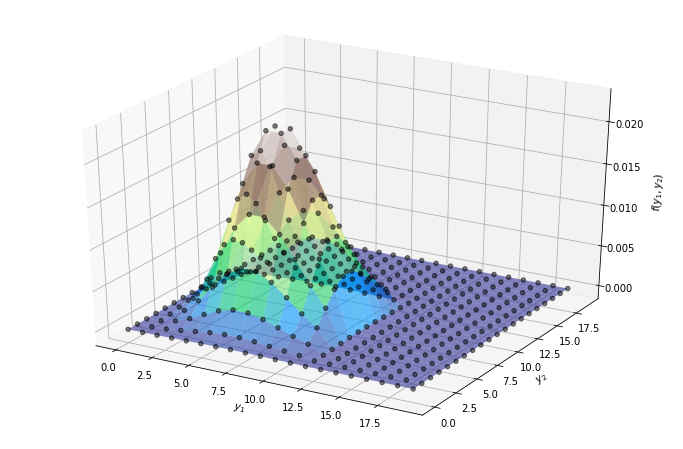

In [28]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_joint_poisson(μ=7, y_n=20):
    yi_values = np.arange(0, y_n, 1)

    # Create coordinate points of X and Y
    X, Y = np.meshgrid(yi_values, yi_values)

    # Multiply distributions together
    Z = poisson_pmf(X, μ) * poisson_pmf(Y, μ)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z.T, cmap='terrain', alpha=0.6)
    ax.scatter(X, Y, Z.T, color='black', alpha=0.5, linewidths=1)
    ax.set(xlabel='$y_1$', ylabel='$y_2$')
    ax.set_zlabel('$f(y_1, y_2)$', labelpad=10)
    plt.show()

plot_joint_poisson(μ=7, y_n=20)

## MLE Estimation